# Heart Failure Prediciton Tensor Flow (Classification)

In [1]:
# Get the data
!wget https://raw.githubusercontent.com/YousefRiad/HeartFailurePredictionTensorFlow/master/heart.csv

--2024-01-21 21:55:48--  https://raw.githubusercontent.com/YousefRiad/HeartFailurePredictionTensorFlow/master/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35921 (35K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  35.08K  --.-KB/s    in 0.003s  

2024-01-21 21:55:48 (10.6 MB/s) - ‘heart.csv’ saved [35921/35921]



In [4]:
# Read the data
import pandas as pd
dataset = pd.read_csv("/content/heart.csv")

In [20]:
# View the data
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [27]:
# Lets normalize the data and one hot encode the non number values
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina","ST_Slope"])
)

# Create X & y
X = dataset.drop("HeartDisease", axis=1)
y = dataset["HeartDisease"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split the data by 20%

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [28]:
# View the data after normalization
X_train_normal

array([[0.27083333, 0.6       , 0.39800995, ..., 1.        , 0.        ,
        0.        ],
       [0.14583333, 0.65      , 0.34660033, ..., 0.        , 0.        ,
        1.        ],
       [0.5625    , 0.75      , 0.35323383, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.64583333, 0.65      , 0.41956882, ..., 0.        , 0.        ,
        1.        ],
       [0.64583333, 0.76      , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.22916667, 0.75      , 0.65008292, ..., 0.        , 1.        ,
        0.        ]])

In [40]:
 # Evaulaute the train model with all the features
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])

model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history = model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 2ms/step - loss: 0.5229 - accuracy: 0.8270
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8583
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.8624
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8706
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8651
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.8665
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8597
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.8665
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8651
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8706
Epoch 11/

In [43]:
# Evaluate the model on the test data
model.evaluate(X_test_normal, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.3751 - accuracy: 0.8370


[0.37508144974708557, 0.8369565010070801]

In [44]:
y_pred = model.predict(X_test_normal)

6/6 [==============================] - 0s 2ms/step


In [45]:
y_pred

array([[1.43119125e-02],
       [4.95998621e-01],
       [9.81068015e-01],
       [9.80063319e-01],
       [1.60074495e-02],
       [6.23677850e-01],
       [9.73259330e-01],
       [2.26202115e-01],
       [8.14375639e-01],
       [9.90994275e-01],
       [5.99300742e-01],
       [2.16646239e-01],
       [6.38369381e-01],
       [3.86789143e-02],
       [8.69722724e-01],
       [8.18911135e-01],
       [1.43422734e-03],
       [8.76427174e-01],
       [9.03302133e-01],
       [3.14966105e-02],
       [7.59236157e-01],
       [9.24189329e-01],
       [5.19661792e-03],
       [6.15472019e-01],
       [8.79652023e-01],
       [9.15544868e-01],
       [1.50833204e-02],
       [4.63337868e-01],
       [8.59686881e-02],
       [5.59357647e-03],
       [8.19706678e-01],
       [7.94573277e-02],
       [5.32670766e-02],
       [9.52952743e-01],
       [9.84696031e-01],
       [9.55784768e-02],
       [9.41409886e-01],
       [1.33817457e-02],
       [8.93732786e-01],
       [9.59127545e-01],


In [46]:
y_pred = tf.round(y_pred)

In [47]:
y_pred

<tf.Tensor: shape=(184, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
 

In [49]:
y_test[:10], y_pred[:10]

(668    0
 30     1
 377    1
 535    1
 807    0
 793    1
 363    1
 583    0
 165    1
 483    1
 Name: HeartDisease, dtype: int64,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.]], dtype=float32)>)

Text(0.5, 1.0, 'Loss and accuracy ')

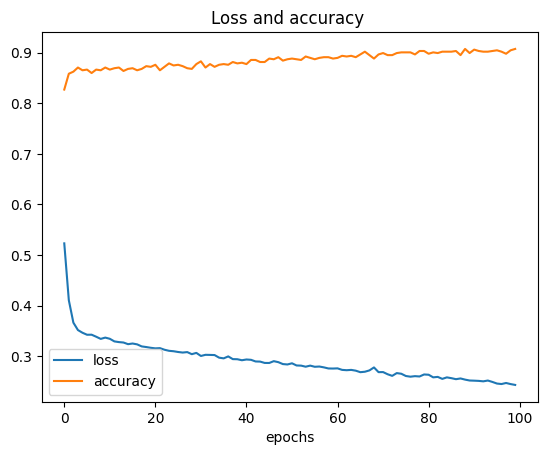

In [48]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.title("Loss and accuracy ")